In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ppdd = pd.read_csv("https://raw.githubusercontent.com/rm0anand/ppdd/main/post%20natal%20data.csv")

In [3]:
ppdd.drop('Timestamp', axis=1, inplace=True)

In [4]:
ppdd =ppdd.dropna(axis=0)
# To clean column name
ppdd.columns = ppdd.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
ppdd =ppdd.dropna(axis=0)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ppdd['irritable_towards_baby_and_partner'] = le.fit_transform(ppdd['irritable_towards_baby_and_partner'])
ppdd['trouble_sleeping_at_night'] = le.fit_transform(ppdd['trouble_sleeping_at_night'])
ppdd['problems_concentrating_or_making_decision'] = le.fit_transform(ppdd['problems_concentrating_or_making_decision'])
ppdd['overeating_or_loss_of_appetite'] = le.fit_transform(ppdd['overeating_or_loss_of_appetite'])
ppdd['feeling_anxious'] = le.fit_transform(ppdd['feeling_anxious'])
ppdd['problems_of_bonding_with_baby'] = le.fit_transform(ppdd['problems_of_bonding_with_baby'])
ppdd['suicide_attempt'] = le.fit_transform(ppdd['suicide_attempt'])
ppdd['feeling_of_guilt'] = le.fit_transform(ppdd['feeling_of_guilt'])
ppdd['feeling_sad_or_tearful'] = le.fit_transform(ppdd['feeling_sad_or_tearful'])
ppdd['age'] = le.fit_transform(ppdd['age'])

In [7]:
from sklearn.model_selection import train_test_split
y = ppdd.feeling_anxious

ppdd_features = ppdd[['problems_of_bonding_with_baby', 'problems_concentrating_or_making_decision', 'age', 'irritable_towards_baby_and_partner', 'suicide_attempt']]
X= ppdd_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 1115 to 1134
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   problems_of_bonding_with_baby              1192 non-null   int64
 1   problems_concentrating_or_making_decision  1192 non-null   int64
 2   age                                        1192 non-null   int64
 3   irritable_towards_baby_and_partner         1192 non-null   int64
 4   suicide_attempt                            1192 non-null   int64
dtypes: int64(5)
memory usage: 55.9 KB
None


In [17]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# Perform grid search
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300}
Best cross-validation score: 0.9018213142997785


In [40]:
from math import gamma
from xgboost import XGBClassifier

# Create and fit the model
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
xgb_classifier.score(X_train, y_train)

0.9337248322147651

In [42]:
xgb_classifier.score(X_test, y_test)

0.9163879598662207

In [43]:
y_pred_xgb = xgb_classifier.predict(X_test)

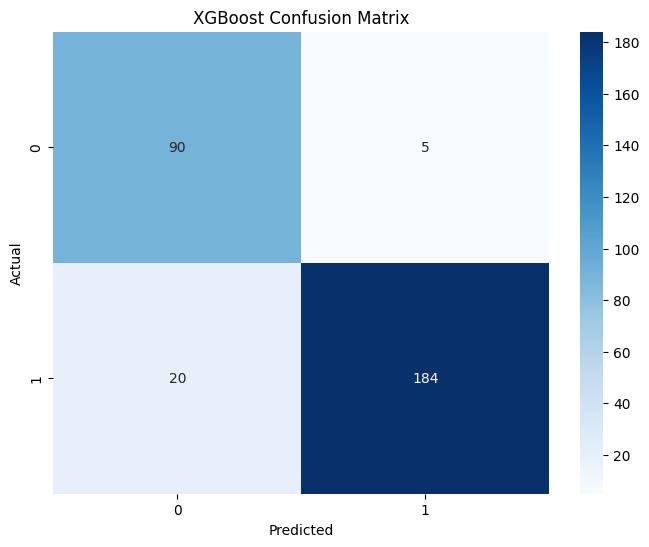

XGBoost Metrics:
Accuracy: 0.9163879598662207
Precision: 0.9735449735449735
Recall: 0.9019607843137255
F1 Score: 0.9363867684478372


In [46]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Confusion matrix
cm_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluation metrics
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
precision_xgb = metrics.precision_score(y_test, y_pred_xgb)
recall_xgb = metrics.recall_score(y_test, y_pred_xgb)
f1_xgb = metrics.f1_score(y_test, y_pred_xgb)

print("XGBoost Metrics:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)
